https://medium.com/@jongdae.lim/%EA%B8%B0%EA%B3%84-%ED%95%99%EC%8A%B5-machine-learning-%EC%9D%80-%EC%A6%90%EA%B2%81%EB%8B%A4-part-4-63ed781eee3c

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import face_recognition
from skimage.feature import hog
from skimage import data, exposure, io
import dlib

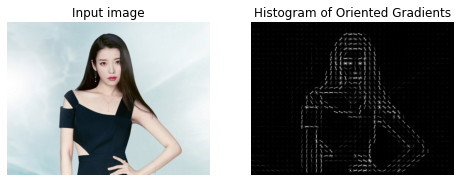

In [2]:
image = io.imread("http://spnimage.edaily.co.kr/images/Photo/files/NP/S/2021/05/PS21051800093.jpg")
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [17]:
face_detector = dlib.get_frontal_face_detector()
win = dlib.image_window()
image = io.imread("http://spnimage.edaily.co.kr/images/Photo/files/NP/S/2021/05/PS21051800093.jpg")
detected_faces = face_detector(image, 1)
print("I found {} faces in the file {}".format(len(detected_faces), ""))
win.set_image(image)
for i, face_rect in enumerate(detected_faces):
    win.add_overlay(face_rect)
           
dlib.hit_enter_to_continue()

I found 1 faces in the file 


In [38]:
face_locations = face_recognition.face_locations(image)

for face_location in face_locations:
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    pil_image.show()

A face is located at pixel location Top: 104, Left: 282, Bottom: 211, Right: 390


In [39]:
import sys
predictor_model = "shape_predictor_68_face_landmarks.dat"
face_pose_predictor = dlib.shape_predictor(predictor_model)
win = dlib.image_window()
detected_faces = face_detector(image, 1)
win.set_image(image)
for i, face_rect in enumerate(detected_faces):
    win.add_overlay(face_rect)
    pose_landmarks = face_pose_predictor(image, face_rect)
    win.add_overlay(pose_landmarks)      
dlib.hit_enter_to_continue()

In [40]:
import cv2
import openface
import openface.openface.align_dlib as openface
face_detector = dlib.get_frontal_face_detector()
face_pose_predictor = dlib.shape_predictor(predictor_model)
face_aligner = openface.AlignDlib(predictor_model)

# Run the HOG face detector on the image data
detected_faces = face_detector(image, 1)
# Loop through each face we found in the image
for i, face_rect in enumerate(detected_faces):
    pose_landmarks = face_pose_predictor(image, face_rect)
    alignedFace = face_aligner.align(534, image, face_rect, landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)
    cv2.imwrite("aligned_face_{}.jpg".format(i), alignedFace)

In [43]:
test = Image.fromarray(alignedFace)
test.show()